<a href="https://colab.research.google.com/github/Rutujabhonde18/DataScience_Internship/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font><h1><b>OASIS INFOBYTE INTERNSHIP September-23</b></h1></font>
<font><h2><b><i>DATA SCIENCE</i></b></h2></font>

<font><h2><b><u>Task 4 : 'EMAIL SPAM DETECTION' </u></b></h2></font>

<font><h3><b>Intern : Rutuja Madan Bhonde</b></h3></font>




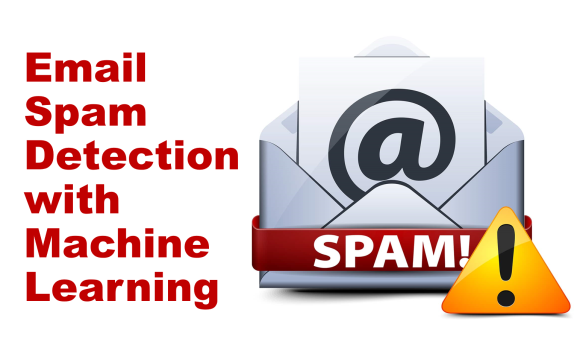

**PROBLEM STATEMENT** : Spam mail is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.
In this Project, we use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam.

# **Importing Libraries**

In [ ]:
# Import libraries for Analysis
import numpy as np
import pandas as pd
import re

# Import Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import Libraries for LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Import Libraries for train_test_split
from sklearn.model_selection import train_test_split

# Import Libraries for decision
from sklearn.linear_model import LogisticRegression

# Import Libraries for check accuracy
from sklearn.metrics import accuracy_score

# Import Libraries for CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# **Import dataset**

In [ ]:
# Import dataset
data = pd.read_csv("/content/spam.csv", encoding = 'ISO-8859-1')

# **Data Analysis**

In [ ]:
# Print first 5 rows of dataset
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# Print last 5 rows of dataset
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
# Check rows & columns
data.shape

(5572, 5)

In [ ]:
# Basic status about data
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
# Information about datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# Check null values
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
# drop columns Unnamed: 2,	Unnamed: 3,	Unnamed: 4
data.drop(columns=['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'],inplace=True)

In [ ]:
# rename the column
data = data.rename(columns={'v1':'ID','v2':'Message'})

In [ ]:
data.head()

,ID,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Check null values
data.isnull().sum()

ID         0
Message    0
dtype: int64

In [ ]:
# Check duplicat values
data.duplicated().sum()

403

In [ ]:
data.drop_duplicates(keep='first',inplace=True)

In [ ]:
# Check duplicat values
data.duplicated().sum()

0

# **Label Encoding**

In [ ]:
encoder = LabelEncoder()
encoder

LabelEncoder()

In [ ]:
data['ID'] = encoder.fit_transform(data['ID'])
data['ID']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: ID, Length: 5169, dtype: int64

In [ ]:
data.head()

,ID,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Here,

0.  ham
1. spam

# **Data Visualization**

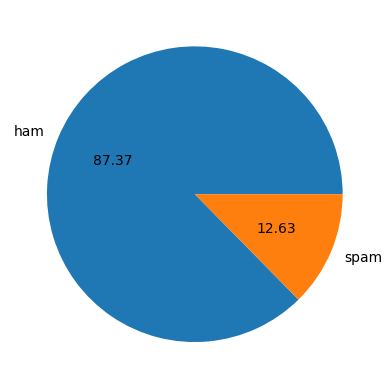

In [ ]:
# Plot piechart

plt.pie(data['ID'].value_counts(), labels= ['ham','spam'], autopct= '%0.2f')
plt.show()

# **Model Building**

**feature selection**

In [ ]:
X = data['Message']
y = data["ID"]

In [ ]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object

In [ ]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: ID, Length: 5169, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4135,)
(1034,)
(4135,)
(1034,)


**CountVectorizer**

In [ ]:
cv = CountVectorizer()
cv

CountVectorizer()

In [ ]:
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [ ]:
print(X_train_cv)

  (0, 5825)	1
  (0, 6678)	1
  (1, 1694)	1
  (1, 5513)	1
  (1, 6528)	1
  (1, 2429)	1
  (1, 4343)	1
  (1, 4097)	1
  (1, 1524)	1
  (1, 7501)	1
  (1, 392)	1
  (1, 7337)	1
  (1, 4652)	1
  (1, 1372)	1
  (2, 6217)	1
  (2, 7234)	1
  (2, 3584)	1
  (2, 6689)	1
  (2, 1224)	1
  (2, 6488)	1
  (3, 6689)	1
  (3, 7543)	1
  (3, 2940)	1
  (3, 5689)	1
  (3, 3691)	1
  :	:
  (4132, 2680)	1
  (4132, 2557)	1
  (4133, 6805)	1
  (4133, 1611)	1
  (4133, 4717)	1
  (4133, 4284)	1
  (4133, 5907)	1
  (4133, 4062)	1
  (4133, 1058)	2
  (4133, 6956)	1
  (4133, 1780)	1
  (4133, 250)	1
  (4133, 2632)	1
  (4133, 2411)	1
  (4133, 6075)	1
  (4133, 5691)	1
  (4133, 7551)	1
  (4133, 629)	1
  (4133, 5652)	1
  (4133, 1525)	1
  (4134, 1555)	1
  (4134, 1559)	1
  (4134, 7242)	1
  (4134, 4840)	1
  (4134, 4148)	1


**Model Selection (Logistic regresion)**

In [ ]:
Model=LogisticRegression()
Model.fit(X_train_cv,y_train)

LogisticRegression()

In [ ]:
prediction = Model.predict(X_train_cv)
prediction

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
prediction = Model.predict(X_test_cv)
prediction

array([0, 0, 0, ..., 1, 0, 0])

**Now, we check Accuracy of our model**

# **Accuracy**

In [ ]:
# Auracy of testing model
accuracy_score(y_test, prediction)

0.97678916827853

# **Conclusion**

Accuracy of our model is 97%

So, we can say that it is a good model.